#Q: 4 Closing

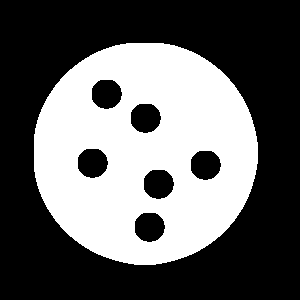

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

img = Image.open("/content/closing.png")
img_arr = np.array(img, dtype = np.uint8)

K = 22
kernal = np.zeros((K,K), dtype=np.uint8)

D0 = math.floor(K/2)
centre = D0

kernal = np.zeros((22,22), dtype = np.uint8)
for i in range(K):
  for j in range(K):
    D_uv = np.sqrt((i-centre)**2 + (j-centre)**2)
    if D_uv <= D0:
      kernal[i][j] = 1
    else:
      kernal[i][j] = 0

img_arr2 = np.zeros((np.size(img_arr, 0),np.size(img_arr, 1)), dtype = np.uint8)
wall = math.floor(K/2)
temp = np.zeros((22,22), dtype=np.uint8)
product = np.zeros((22,22), dtype=np.uint8)

for i in range(wall, np.size(img_arr2, 0)-wall+1):
  for j in range(wall, np.size(img_arr2, 1)-wall+1):
    temp = img_arr[i-wall:i+wall:1, j-wall:j+wall:1]
    product = kernal * temp
    img_arr2[i][j] = np.max(product)

img_arr3 = np.empty_like(img_arr2)
img_arr3[:] = img_arr2

for i in range(wall, np.size(img_arr2, 0)-wall):
  for j in range(wall, np.size(img_arr2, 1)-wall):
    temp = img_arr2[i-wall:i+1+wall:1, j-wall:j+1+wall:1]
    flag = 1
    for x in range(22):
      for y in range(22):
        if kernal[x][y] == 1 and temp[x][y] != 1:
          img_arr3[i][j] = 0
          flag = 0
          break
      if flag == 0:
        break
    img_arr3[i][j] = img_arr3[i][j] * 255


img2 = Image.fromarray(img_arr3)
img2